<a href="https://colab.research.google.com/github/cibelerusso/AnaliseMultivariadaEAprendizadoNaoSupervisionado/blob/master/Comandos%20em%20Python/9%20An%C3%A1lisedeCorrela%C3%A7%C3%A3oCanonica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Multivariada e Aprendizado Não-Supervisionado

por Cibele Russo.

ICMC USP São Carlos.

## Aula 9b: Análise de Correlações Canônicas - Aplicação em Python

**Referências**

- https://cran.r-project.org/web/packages/CCA/CCA.pdf (em R)

**Exemplo:** O conjunto de dados disponível em


https://stats.idre.ucla.edu/stat/data/mmreg.csv


contém observações de oito variáveis em 600 indivíduos. As variáveis de natureza psicológica são *locus of control*, *self-concept* e *motivation*. Foram coletadas também variáveis acadêmicas padronizadas de testes de *reading*, *writing*, *math* e *science*. Adicionalmente, a variável *female* é uma variável indicadora que assume 1 para estudante do sexo feminino e 0 para estudante do sexo masculino. O objetivo principal do pesquisador é avaliar quantas dimensões são necessárias para entender a associação entre os dois conjuntos de variáveis (psicológicas e acadêmicas).

a. Desenvolva uma análise exploratória dos dados em questão.

b. Realize uma análise de correlações canônicas.

(em R, os comandos estão disponíveis em
https://stats.idre.ucla.edu/r/dae/canonical-correlation-analysis/ )



In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA

plt.rcParams["figure.figsize"] = (12,12)

In [241]:
df = pd.read_csv("https://stats.idre.ucla.edu/stat/data/mmreg.csv")
df.head()

,locus_of_control,self_concept,motivation,read,write,math,science,female
0,-0.84,-0.24,1.00,54.8,64.5,44.5,52.6,1
1,-0.38,-0.47,0.67,62.7,43.7,44.7,52.6,1
2,0.89,0.59,0.67,60.6,56.7,70.5,58.0,0
3,0.71,0.28,0.67,62.7,56.7,54.7,58.0,0
4,-0.64,0.03,1.00,41.6,46.3,38.4,36.3,1


In [242]:
df.shape

(600, 8)

In [243]:
X = df.iloc[:,0:3]
Y = df.iloc[:,3:8]

In [244]:
X.head()

,locus_of_control,self_concept,motivation
0,-0.84,-0.24,1.00
1,-0.38,-0.47,0.67
2,0.89,0.59,0.67
3,0.71,0.28,0.67
4,-0.64,0.03,1.00


In [245]:
Y.head()

,read,write,math,science,female
0,54.8,64.5,44.5,52.6,1
1,62.7,43.7,44.7,52.6,1
2,60.6,56.7,70.5,58.0,0
3,62.7,56.7,54.7,58.0,0
4,41.6,46.3,38.4,36.3,1


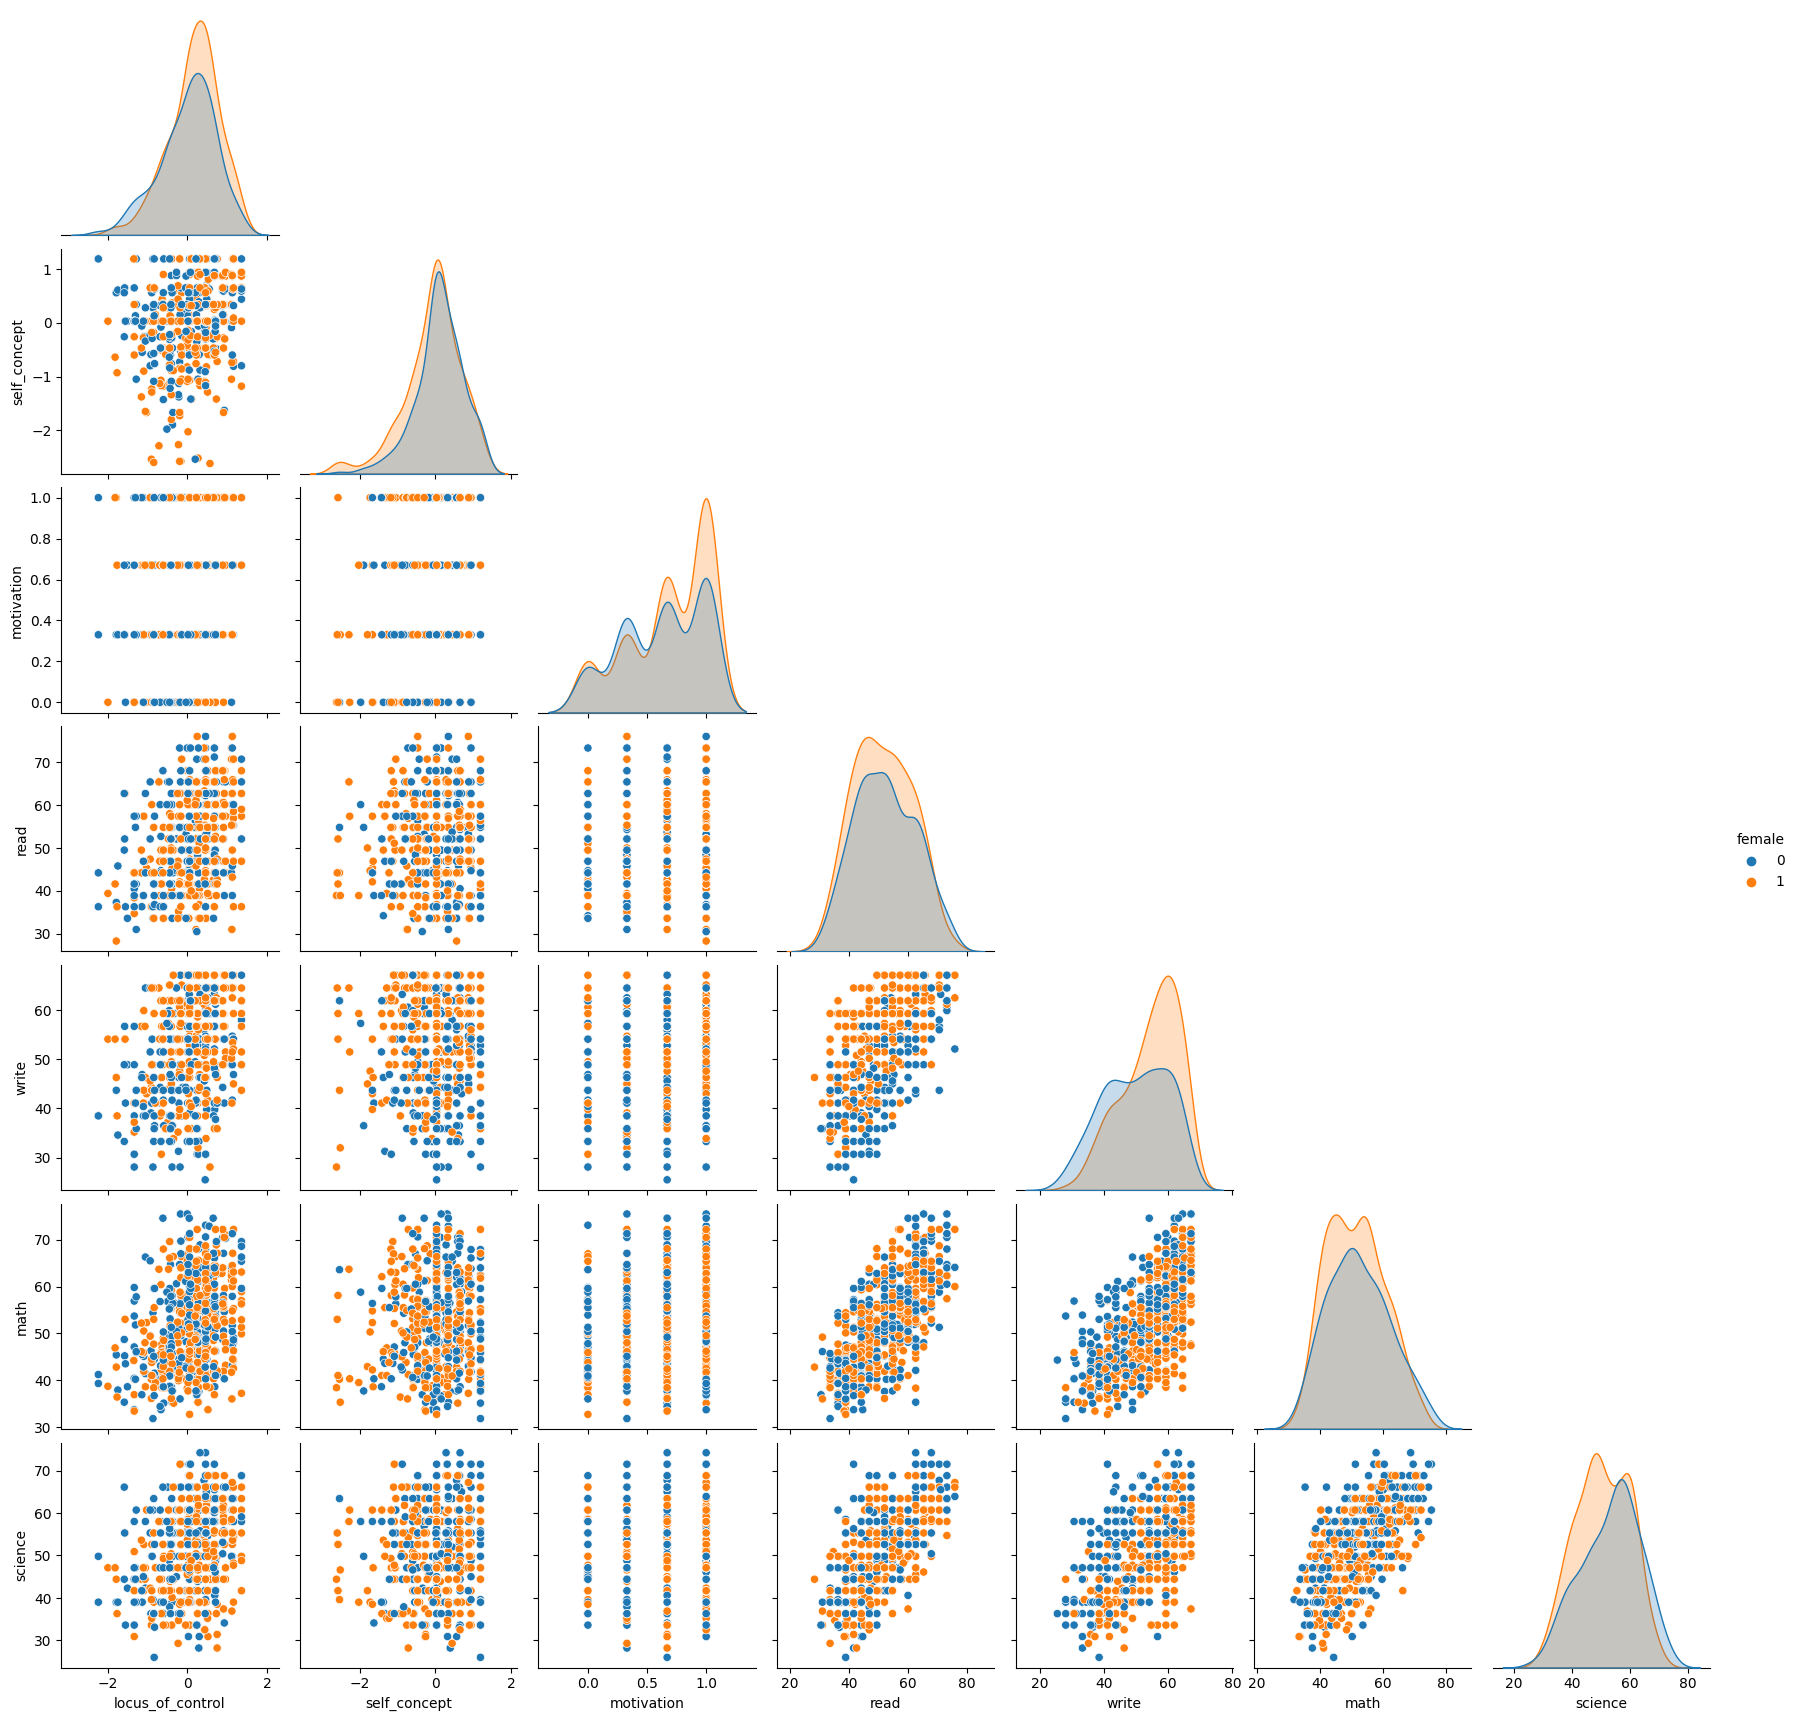

In [246]:
import seaborn as sns
sns.pairplot(df, hue='female', corner=True);

In [250]:
corr

,locus_of_control,self_concept,motivation,read,write,math,science,female
locus_of_control,1.000000,0.171188,0.245132,0.373565,0.358877,0.337269,0.324627,0.113411
self_concept,0.171188,1.000000,0.288571,0.060656,0.019449,0.053598,0.069826,-0.125951
motivation,0.245132,0.288571,1.000000,0.210610,0.254248,0.195013,0.115669,0.098103
read,0.373565,0.060656,0.210610,1.000000,0.628591,0.679276,0.690693,-0.041743
write,0.358877,0.019449,0.254248,0.628591,1.000000,0.632666,0.569150,0.244332
math,0.337269,0.053598,0.195013,0.679276,0.632666,1.000000,0.649526,-0.048218
science,0.324627,0.069826,0.115669,0.690693,0.569150,0.649526,1.000000,-0.138186
female,0.113411,-0.125951,0.098103,-0.041743,0.244332,-0.048218,-0.138186,1.000000


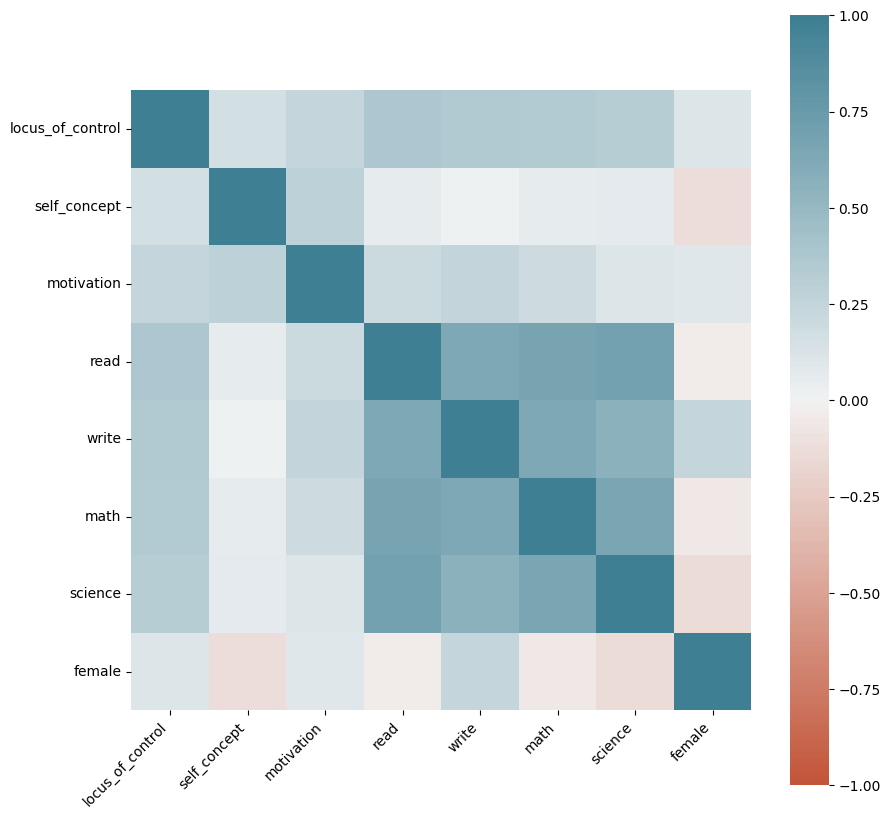

In [251]:
corr = df.corr()
ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
X.shape

In [249]:
Y.shape

(600, 5)

In [252]:
cca = CCA(n_components=3)

cca.fit(X, Y)


CCA(n_components=3)

In [253]:
cca.x_loadings_

array([[ 0.88345951,  0.4496546 , -0.16885294],
       [ 0.02039914,  0.81823427,  0.67733444],
       [ 0.55421035, -0.40475425,  0.71603543]])

U1 = 0.883 X1 + 0.02 X2 + 0.554 X3

In [254]:
cca.y_loadings_

array([[ 0.57937624,  0.35979895,  0.20386251],
       [ 0.60425404, -0.0649778 ,  0.38358287],
       [ 0.52663967,  0.29876267,  0.2225597 ],
       [ 0.45389249,  0.67855932, -0.34727975],
       [ 0.25099684, -0.75705822, -0.81857614]])

V1 = 0.579 Y1 + 0.604 Y2 + 0.527 Y3 + 0.454 Y4 + 0.251 Y5

In [255]:
cca.x_rotations_

array([[ 0.86003872,  0.36077925, -0.46173054],
       [-0.25362468,  0.72616836,  0.60678722],
       [ 0.44272781, -0.60184201,  0.71370428]])

In [256]:
cca.y_rotations_

array([[ 0.65394154,  0.04950559,  0.14335184],
       [ 0.5061941 , -0.40795497,  0.58945352],
       [ 0.31981197, -0.03970026,  0.05872736],
       [ 0.07077307,  0.82419288, -0.70762561],
       [ 0.45698957, -0.53929422, -0.5935395 ]])

In [257]:
X_c, Y_c = cca.transform(X, Y)

Y_c.shape

(600, 3)

In [258]:
df[['U1', 'U2', 'U3']] = X_c
df[['V1', 'V2', 'V3']] = Y_c

In [259]:
df

,locus_of_control,self_concept,motivation,read,write,math,science,female,U1,U2,U3,V1,V2,V3
0,-0.84,-0.24,1.00,54.8,64.5,44.5,52.6,1,-0.675499,-1.351764,1.140783,0.991768,-0.884255,0.126631
1,-0.38,-0.47,0.67,62.7,43.7,44.7,52.6,1,-0.428873,-0.761413,-0.061105,0.427415,0.026023,-1.020573
2,0.89,0.59,0.67,60.6,56.7,70.5,58.0,0,0.819610,1.013201,-0.024290,0.966890,0.902299,0.695644
3,0.71,0.28,0.67,62.7,56.7,54.7,58.0,0,0.700093,0.597240,-0.166915,0.566103,0.979215,0.626883
4,-0.64,0.03,1.00,41.6,46.3,38.4,36.3,1,-0.515940,-0.966208,1.235229,-1.135884,-1.543957,-0.013346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.94,-0.30,1.00,60.1,67.1,52.4,55.3,1,1.629995,-0.455432,-0.136996,1.758181,-0.771381,0.211837
596,0.23,0.03,1.00,65.4,56.7,65.4,58.0,1,0.600360,-0.497929,0.635918,2.021278,-0.134755,-0.458984
597,0.46,0.03,1.00,65.4,51.5,61.4,60.7,1,0.895474,-0.374132,0.477480,1.634464,0.329484,-0.995914
598,0.51,0.03,1.00,54.8,54.1,66.4,41.7,1,0.959629,-0.347219,0.443037,1.114971,-1.465964,0.427627


In [260]:
np.corrcoef(df['U1'],df['V1'])

array([[1.        , 0.46408608],
       [0.46408608, 1.        ]])

In [261]:
np.corrcoef(df['U2'],df['V2'])

array([[1.        , 0.16750915],
       [0.16750915, 1.        ]])

In [262]:
np.corrcoef(df['U3'],df['V3'])

array([[1.        , 0.10399115],
       [0.10399115, 1.        ]])

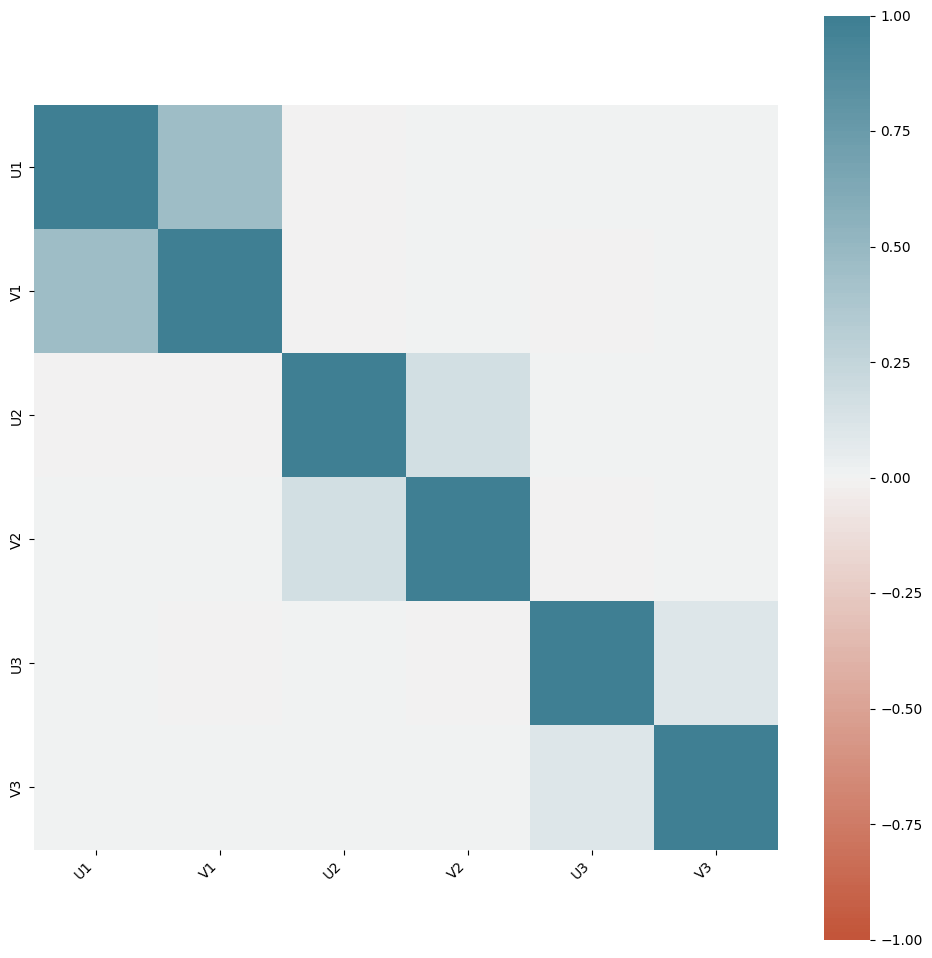

In [263]:
corr = df[['U1','V1','U2','V2','U3','V3']].corr()
ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Contas detalhadas, sem considerar o sexo

In [264]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,7)

In [266]:
dados = df.iloc[:,0:7]
dados.shape

(600, 7)

In [267]:
S = np.cov(dados.T)
S.shape

(7, 7)

In [ ]:
S

In [268]:
S_xx = S[0:3,0:3]
S_xx

array([[0.44927511, 0.08095313, 0.05631291],
       [0.08095313, 0.49774791, 0.06977636],
       [0.05631291, 0.06977636, 0.11746341]])

In [269]:
S_yy = S[3:7,3:7]
S_yy

array([[102.07026375,  61.76924321,  64.61061119,  67.73028436],
       [ 61.76924321,  94.60392652,  57.93453406,  53.73156316],
       [ 64.61061119,  57.93453406,  88.6372611 ,  59.3544207 ],
       [ 67.73028436,  53.73156316,  59.3544207 ,  94.2099054 ]])

In [270]:
S_xy = S[0:3,3:7]
S_xy

array([[2.52971755, 2.33967855, 2.12833876, 2.11197618],
       [0.43234156, 0.13345867, 0.35600743, 0.47815888],
       [0.72925556, 0.84754688, 0.62925125, 0.3847852 ]])

In [271]:
A = np.linalg.inv(S_xx).dot(S_xy).dot(np.linalg.inv(S_yy)).dot(S_xy.T)

In [272]:
np.linalg.eig(A)

(array([0.19930553, 0.02351899, 0.00050641]),
 array([[-0.70112081,  0.26676881, -0.29190921],
        [ 0.13276995,  0.29328945,  0.70831434],
        [-0.70057244, -0.91804995,  0.64271285]]))

In [273]:
autovaloresA = np.linalg.eig(A)[0]
autovaloresA

array([0.19930553, 0.02351899, 0.00050641])

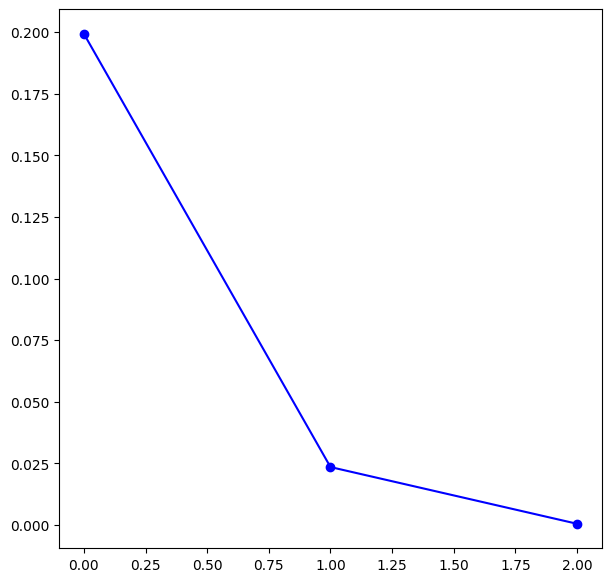

In [274]:
plt.plot(autovaloresA,'bo-')

In [275]:
autovetoresA = np.linalg.eig(A)[1]
autovetoresA

array([[-0.70112081,  0.26676881, -0.29190921],
       [ 0.13276995,  0.29328945,  0.70831434],
       [-0.70057244, -0.91804995,  0.64271285]])

Primeira variável canônica em X

U1 = -0.7 X1 + 0.13 X2 - 0.7 X3

In [276]:
B = np.linalg.inv(S_yy).dot(S_xy.T).dot(np.linalg.inv(S_xx)).dot(S_xy)

In [277]:
np.linalg.eig(B)

(array([ 1.99305533e-01,  2.35189905e-02,  5.06406553e-04, -7.09975323e-18]),
 array([[ 0.60131518,  0.0103659 ,  0.48931849,  0.66969261],
        [ 0.75205256,  0.58837514, -0.53251114, -0.00201704],
        [ 0.26485663,  0.01923272,  0.48649733, -0.74070793],
        [-0.05184565, -0.80829286, -0.49022408, -0.05347433]]))

In [278]:
autovaloresB = np.linalg.eig(B)[0]
autovaloresB

array([ 1.99305533e-01,  2.35189905e-02,  5.06406553e-04, -7.09975323e-18])

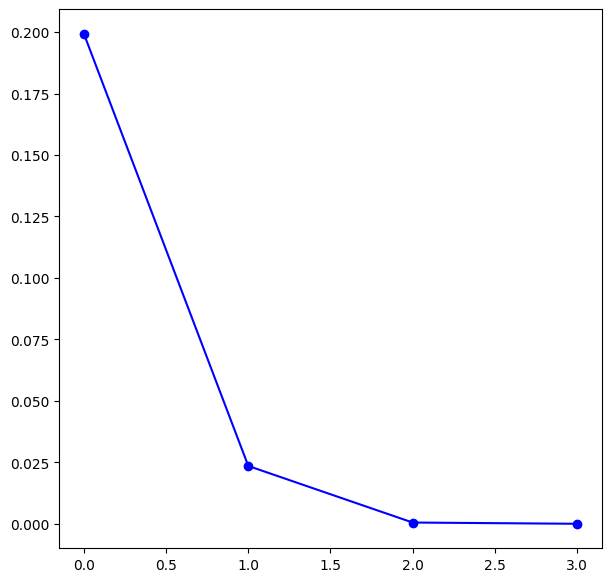

In [279]:
plt.plot(autovalores,'bo-')


In [280]:
autovetoresB = np.linalg.eig(B)[1]
autovetoresB

array([[ 0.60131518,  0.0103659 ,  0.48931849,  0.66969261],
       [ 0.75205256,  0.58837514, -0.53251114, -0.00201704],
       [ 0.26485663,  0.01923272,  0.48649733, -0.74070793],
       [-0.05184565, -0.80829286, -0.49022408, -0.05347433]])

In [281]:
autovetoresB[:,0]

array([ 0.60131518,  0.75205256,  0.26485663, -0.05184565])

Primeira variável canônica em Y

V1 = 0.6 Y1 + .75 Y2 0.26 Y3 -0.05 Y4

Cálculo de U1

In [285]:
autovetoresA[:,0].shape

(3,)

In [286]:
dados.iloc[:,0:3].to_numpy().shape

(600, 3)

In [287]:
autovetoresA[:,0].T.shape

(3,)

In [288]:
dados.iloc[:,0:3].to_numpy().shape

(600, 3)

In [289]:
dados['U1'] = dados.iloc[:,0:3].to_numpy().dot(autovetoresA[:,0])

In [290]:
dados

,locus_of_control,self_concept,motivation,read,write,math,science,U1
0,-0.84,-0.24,1.00,54.8,64.5,44.5,52.6,-0.143496
1,-0.38,-0.47,0.67,62.7,43.7,44.7,52.6,-0.265360
2,0.89,0.59,0.67,60.6,56.7,70.5,58.0,-1.015047
3,0.71,0.28,0.67,62.7,56.7,54.7,58.0,-0.930004
4,-0.64,0.03,1.00,41.6,46.3,38.4,36.3,-0.247872
...,...,...,...,...,...,...,...,...
595,0.94,-0.30,1.00,60.1,67.1,52.4,55.3,-1.399457
596,0.23,0.03,1.00,65.4,56.7,65.4,58.0,-0.857847
597,0.46,0.03,1.00,65.4,51.5,61.4,60.7,-1.019105
598,0.51,0.03,1.00,54.8,54.1,66.4,41.7,-1.054161


Cálculo de V1


In [291]:
autovetoresB[:,0].shape

(4,)

In [292]:
dados.iloc[:,3:7].to_numpy().shape

(600, 4)

In [293]:
autovetoresB[:,0].T.shape

(4,)

In [294]:
dados.iloc[:,3:7].to_numpy().shape

(600, 4)

In [295]:
dados.iloc[:,3:7].to_numpy().dot(autovetoresB[:,0]).shape

(600,)

In [296]:
dados['V1'] = dados.iloc[:,3:7].to_numpy().dot(autovetoresB[:,0])

In [297]:
dados

,locus_of_control,self_concept,motivation,read,write,math,science,U1,V1
0,-0.84,-0.24,1.00,54.8,64.5,44.5,52.6,-0.143496,90.518501
1,-0.38,-0.47,0.67,62.7,43.7,44.7,52.6,-0.265360,79.679169
2,0.89,0.59,0.67,60.6,56.7,70.5,58.0,-1.015047,94.746425
3,0.71,0.28,0.67,62.7,56.7,54.7,58.0,-0.930004,91.824452
4,-0.64,0.03,1.00,41.6,46.3,38.4,36.3,-0.247872,68.123242
...,...,...,...,...,...,...,...,...,...
595,0.94,-0.30,1.00,60.1,67.1,52.4,55.3,-1.399457,97.613192
596,0.23,0.03,1.00,65.4,56.7,65.4,58.0,-0.857847,96.281969
597,0.46,0.03,1.00,65.4,51.5,61.4,60.7,-1.019105,91.171886
598,0.51,0.03,1.00,54.8,54.1,66.4,41.7,-1.054161,89.062632


Cálculo da correlação


In [298]:
np.corrcoef(df['U1'], df['V1'])

array([[1.        , 0.46408608],
       [0.46408608, 1.        ]])

In [299]:
n=len(dados)
p = 3
q = 4

Teste para $H_0: \Sigma_{xy} = 0$, supondo que a amostra é suficientemente grande

In [300]:
menos2logLambda = -n*np.log(np.prod(1-autovaloresA))
menos2logLambda

147.94941313203398

In [301]:
menos2logLambda = -n*np.log(np.prod(1-autovaloresB))
menos2logLambda

147.94941313203415

In [302]:
import scipy.stats as stats
stats.chi2.ppf(0.95,p*q)

21.02606981748307

In [303]:
S_xx.shape

(3, 3)

In [308]:
S_xx.dot(autovetoresA[:,0].T)

array([-0.34369926, -0.03955536, -0.11250958])

Conclusão?